In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import gridspec
import seaborn as sns
sns.set_style("ticks")
import os
from pathlib import Path
import itertools
import sys
import pickle
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [3]:
path = Path(os.getcwd()).parents[0]

modelpath = os.path.join(path, 'data/network_models/probabilistic_model')

gridsdpath = os.path.join(modelpath, 'grid_sd')

figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)

figs23path = os.path.join(figpath, 'FigS7')
hfn.dir_check(figs23path)

figs23panelpaths = os.path.join(figs23path, 'panels')
hfn.dir_check(figs23panelpaths)

In [4]:
colors5000 = sns.color_palette("Purples_r", 10)#['dark indigo', 'indigo', 'blue violet', 'indigo blue', 'light indigo']
colors10000 = sns.color_palette("PuRd_r", 10)#['royal purple', 'purple', 'bright purple', 'pinkish purple', 'medium purple', 'pale purple']
colors50000 = sns.color_palette("Reds_r", 10)#['dark red', 'burnt red',  'red', 'tomato red', 'light red', 'pastel red']
colors200000 = sns.color_palette("YlOrBr_r", 10)#[ 'orangered', 'orange', 'orangeish', 'pastel orange', 'yellow orange', 'orangey yellow']

# Import SD data

In [5]:
allparams_sdcomp = pd.read_hdf(os.path.join(gridsdpath, 'allparams_sdcomp.h5'))

In [7]:
thisres_params_sd01 = pd.read_hdf(os.path.join(gridsdpath, 'thisres_params_sd01.h5'))
thisres_params_sd02_comp = pd.read_hdf(os.path.join(gridsdpath, 'thisres_params_sd02_comp.h5'))
thisres_params_sd04 = pd.read_hdf(os.path.join(gridsdpath, 'thisres_params_sd04.h5'))

In [9]:
colors10000sd01 = sns.color_palette("Blues_r", 10)#['dark magenta', 'deep magenta', 'bright magenta', 'light magenta', 'orchid', 'bubblegum pink']
colors10000sd04 = sns.color_palette("BuPu_r", 10)#['dark slate blue', 'denim blue', 'dusky blue', 'blueberry', 'dark periwinkle', 'periwinkle blue']

In [10]:
flierprops={ 'markersize': 4,'markerfacecolor': 'None' }
boxprops = {'alpha':0.6}

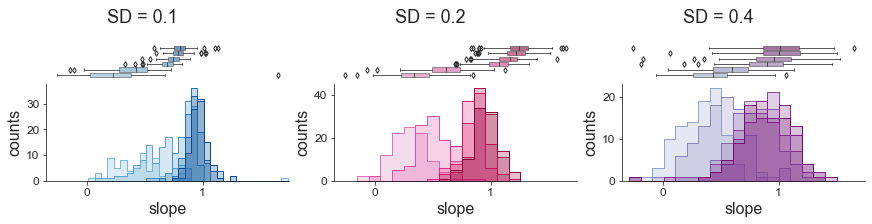

In [11]:
f = plt.figure(constrained_layout = True)
gs = f.add_gridspec(5,6)

ax_title1 = f.add_subplot(gs[0:1, :2])
plt.text(0.25, 0.5,'SD = 0.1', fontsize = 18)
ax_title1.set_axis_off()
ax_box1 = f.add_subplot(gs[1:2, :2])
ax_hist1 = f.add_subplot(gs[2:5, :2])


# f, (ax_box1, ax_hist1) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.1], 
            x = 'slope', 
            y= 'p', orient="h", 
            ax=ax_box1, 
            palette = colors10000sd01[0:6], 
            linewidth = 0.75, 
            flierprops=flierprops, 
            boxprops = boxprops)
h1 = sns.histplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.1], x = 'slope', hue = 'p', element="step", ax = ax_hist1, palette = colors10000sd01[0:6], legend = False)

ax_box1.set_axis_off()
ax_hist1.spines['right'].set_visible(False)
ax_hist1.spines['top'].set_visible(False)
h1.set_xlabel("slope",fontsize=16)
h1.set_ylabel("counts",fontsize=16)
h1.tick_params(labelsize=12)
plt.xlim(-0.35, 1.75)
plt.locator_params(axis='x', nbins=4)


ax_title2 = f.add_subplot(gs[0:1, 2:4])
plt.text(0.25, 0.5,'SD = 0.2', fontsize = 18)
ax_title2.set_axis_off()
ax_box2 = f.add_subplot(gs[1:2, 2:4])
ax_hist2 = f.add_subplot(gs[2:5, 2:4])


sns.boxplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.2],
            x = 'slope',
            y= 'p',
            orient="h", 
            ax=ax_box2, 
            palette = colors10000[0:6], 
            linewidth = 0.75, 
            flierprops=flierprops, 
            boxprops = boxprops)
h2 = sns.histplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.2], x = 'slope', hue = 'p', element="step", ax = ax_hist2, palette = colors10000[0:6], legend = False)

ax_box2.set_axis_off()
ax_hist2.spines['right'].set_visible(False)
ax_hist2.spines['top'].set_visible(False)
h2.set_xlabel("slope",fontsize=16)
h2.set_ylabel("counts",fontsize=16)
h2.tick_params(labelsize=12)
plt.xlim(-0.35, 1.75)
plt.locator_params(axis='x', nbins=4)

ax_title3 = f.add_subplot(gs[0:1, 4:])
plt.text(0.25, 0.5,'SD = 0.4', fontsize = 18)
ax_title3.set_axis_off()
ax_box3 = f.add_subplot(gs[1:2, 4:])
ax_hist3 = f.add_subplot(gs[2:5, 4:])

sns.boxplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.4], 
            x = 'slope', 
            y= 'p', 
            orient="h", 
            ax=ax_box3, 
            palette = colors10000sd04[0:6], 
            linewidth = 0.75, 
            flierprops=flierprops,
            boxprops = boxprops)
h3 = sns.histplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.4], x = 'slope', hue = 'p', element="step", ax = ax_hist3, palette = colors10000sd04[0:6], legend = False)

ax_box3.set_axis_off()
ax_hist3.spines['right'].set_visible(False)
ax_hist3.spines['top'].set_visible(False)
h3.set_xlabel("slope",fontsize=16)
h3.set_ylabel("counts",fontsize=16)
h3.tick_params(labelsize=12)
plt.xlim(-0.35, 1.75)
plt.locator_params(axis='x', nbins=4)

ax_box1.set_rasterized(True)
ax_box2.set_rasterized(True)
ax_box3.set_rasterized(True)
ax_hist1.set_rasterized(True)
ax_hist2.set_rasterized(True)
ax_hist3.set_rasterized(True)
plt.gcf().set_size_inches(12,3)

plt.savefig(os.path.join(figs23panelpaths, 'figS7_a1.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs23panelpaths, 'figS7_a1.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)

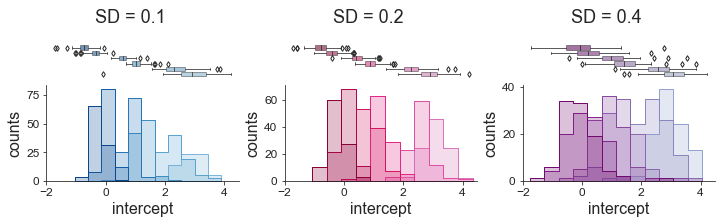

In [12]:
f2 = plt.figure(constrained_layout = True)
gs = f2.add_gridspec(5,6)

ax_title1 = f2.add_subplot(gs[0:1, :2])
plt.text(0.25, 0.5,'SD = 0.1', fontsize = 18)
ax_title1.set_axis_off()
ax_box1 = f2.add_subplot(gs[1:2, :2])
ax_hist1 = f2.add_subplot(gs[2:5, :2])


# f, (ax_box1, ax_hist1) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.1],
            x = 'intercept',
            y= 'p',
            orient="h",
            ax=ax_box1,
            palette = colors10000sd01[0:6],
            linewidth = 0.75,
            flierprops=flierprops,
            boxprops = boxprops)
h1 = sns.histplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.1], x = 'intercept', hue = 'p', element="step", ax = ax_hist1, palette = colors10000sd01[0:6], legend = False)

ax_box1.set_axis_off()
ax_hist1.spines['right'].set_visible(False)
ax_hist1.spines['top'].set_visible(False)
h1.set_xlabel("intercept",fontsize=16)
h1.set_ylabel("counts",fontsize=16)
h1.tick_params(labelsize=12)
plt.xlim(-2,4.5)
plt.locator_params(axis='x', nbins=4)


ax_title2 = f2.add_subplot(gs[0:1, 2:4])
plt.text(0.25, 0.5,'SD = 0.2', fontsize = 18)
ax_title2.set_axis_off()
ax_box2 = f2.add_subplot(gs[1:2, 2:4])
ax_hist2 = f2.add_subplot(gs[2:5, 2:4])


sns.boxplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.2],
            x = 'intercept',
            y= 'p', 
            orient="h", 
            ax=ax_box2, 
            palette = colors10000[0:6], 
            linewidth = 0.75, 
            flierprops=flierprops,
            boxprops = boxprops)
h2 = sns.histplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.2], x = 'intercept', hue = 'p', element="step", ax = ax_hist2, palette = colors10000[0:6], legend = False)

ax_box2.set_axis_off()
ax_hist2.spines['right'].set_visible(False)
ax_hist2.spines['top'].set_visible(False)
h2.set_xlabel("intercept",fontsize=16)
h2.set_ylabel("counts",fontsize=16)
h2.tick_params(labelsize=12)
plt.xlim(-2,4.5)
plt.locator_params(axis='x', nbins=4)

ax_title3 = f2.add_subplot(gs[0:1, 4:])
plt.text(0.25, 0.5,'SD = 0.4', fontsize = 18)
ax_title3.set_axis_off()
ax_box3 = f2.add_subplot(gs[1:2, 4:])
ax_hist3 = f2.add_subplot(gs[2:5, 4:])

sns.boxplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.4],
            x = 'intercept', 
            y= 'p', 
            orient="h", 
            ax=ax_box3, 
            palette = colors10000sd04[0:6], 
            linewidth = 0.75, 
            flierprops=flierprops,
            boxprops = boxprops)
h3 = sns.histplot(data = allparams_sdcomp[allparams_sdcomp.SD == 0.4], x = 'intercept', hue = 'p', element="step", ax = ax_hist3, palette = colors10000sd04[0:6], legend = False)

ax_box3.set_axis_off()
ax_hist3.spines['right'].set_visible(False)
ax_hist3.spines['top'].set_visible(False)
h3.set_xlabel("intercept",fontsize=16)
h3.set_ylabel("counts",fontsize=16)
h3.tick_params(labelsize=12)
plt.xlim(-2,4.5)
plt.locator_params(axis='x', nbins=4)

plt.gcf().set_size_inches(9.92,3)
ax_box1.set_rasterized(True)
ax_box2.set_rasterized(True)
ax_box3.set_rasterized(True)
ax_hist1.set_rasterized(True)
ax_hist2.set_rasterized(True)
ax_hist3.set_rasterized(True)
plt.savefig(os.path.join(figs23panelpaths, 'figS7_a2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs23panelpaths, 'figS7_a2.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)

In [13]:
colors = ["deep magenta", 'royal purple', "dusky blue"]
sns.set_palette = sns.xkcd_palette(colors)
markersp = ['o', 's', 'v', '^', '<', '>']

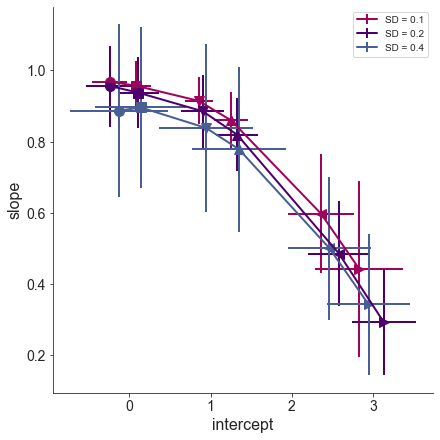

In [14]:
f = plt.figure(figsize = (6, 6), constrained_layout=True)
plt.errorbar(thisres_params_sd01['intercept']['mean'], thisres_params_sd01['slope']['mean'], xerr = thisres_params_sd01['intercept']['std'], yerr = thisres_params_sd01['slope']['std'], label = 'SD = 0.1', lw = 2, c = sns.xkcd_palette(colors)[0])
plt.errorbar(thisres_params_sd02_comp['intercept']['mean'], thisres_params_sd02_comp['slope']['mean'], xerr = thisres_params_sd02_comp['intercept']['std'], yerr = thisres_params_sd02_comp['slope']['std'], label = 'SD = 0.2', lw = 2, c = sns.xkcd_palette(colors)[1])
plt.errorbar(thisres_params_sd04['intercept']['mean'], thisres_params_sd04['slope']['mean'], xerr = thisres_params_sd04['intercept']['std'], yerr = thisres_params_sd04['slope']['std'], label = 'SD = 0.4', lw = 2, c = sns.xkcd_palette(colors)[2])


for j, p in enumerate(thisres_params_sd01.p.unique()):
    for i,ni in enumerate(thisres_params_sd01.Ni.unique()):
        thisres =  thisres_params_sd01[(thisres_params_sd01.Ni == ni) & (thisres_params_sd01.p == p)]
        plt.plot(thisres['intercept']['mean'], thisres['slope']['mean'], c = sns.xkcd_palette(colors)[0], marker = markersp[j], ms = 10)
        
for j, p in enumerate(thisres_params_sd02_comp.p.unique()):
    for i,ni in enumerate(thisres_params_sd02_comp.Ni.unique()):
        thisres =  thisres_params_sd02_comp[(thisres_params_sd02_comp.Ni == ni) & (thisres_params_sd02_comp.p == p)]
        plt.plot(thisres['intercept']['mean'], thisres['slope']['mean'], c = sns.xkcd_palette(colors)[1], marker = markersp[j], ms = 10)
        
for j, p in enumerate(thisres_params_sd04.p.unique()):
    for i,ni in enumerate(thisres_params_sd04.Ni.unique()):
        thisres =  thisres_params_sd04[(thisres_params_sd04.Ni == ni) & (thisres_params_sd04.p == p)]
        plt.plot(thisres['intercept']['mean'], thisres['slope']['mean'], c = sns.xkcd_palette(colors)[2], marker = markersp[j], ms = 10)
        
plt.xlabel('intercept', fontsize = 16)
plt.ylabel('slope', fontsize = 16)

plt.legend()

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.set_rasterized(True)
plt.savefig(os.path.join(figs23panelpaths, 'figS7b.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs23panelpaths, 'figS7b.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)